# Exercise 7

# Part 1 - DT

## Capital Bikeshare data

### Integrantes del Grupo:

* Jorge Enrique Gonzalez Garcia (201920233)
* Daniel Camilo Rojas Arcila (201924286)
* Julian Andrés Velasquez Osorio (201014210)
* Fernando Pérez Moreno (200222809)

## Introduction

- Capital Bikeshare dataset from Kaggle: [data](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)
- Each observation represents the bikeshare rentals initiated during a given hour of a given day

In [301]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import os


In [2]:
# read the data and set "datetime" as the index
bikes = pd.read_csv('C:\\Users\\Fernando\\Documents\\AdvancedMethodsDataAnalysisClass\\datasets\\bikeshare.csv', index_col='datetime', parse_dates=True)

In [3]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
bikes.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [5]:
# "count" is a method, so it's best to rename that column
bikes.rename(columns={'count':'total'}, inplace=True)

In [6]:
# create "hour" as its own feature
bikes['hour'] = bikes.index.hour

In [7]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [8]:
bikes.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,23


- **hour** ranges from 0 (midnight) through 23 (11pm)
- **workingday** is either 0 (weekend or holiday) or 1 (non-holiday weekday)

# Exercise 7.1

Run these two `groupby` statements and figure out what they tell you about the data.

In [9]:
# mean rentals for each value of "workingday"
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

En la muestra se puede observar que en promedio se presentan más rentas de bicicletas compartidas durante los días hábiles frente a los fines de semana y festivos.

In [10]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

Las horas pico de renta de bicicletas son entre las 17:00 y las 18:00 horas en la tarde. En la mañana se presenta un pico a las 8:00.

# Exercise 7.2

Run this plotting code, and make sure you understand the output. Then, separate this plot into two separate plots conditioned on "workingday". (In other words, one plot should display the hourly trend for "workingday=0", and the other should display the hourly trend for "workingday=1".)

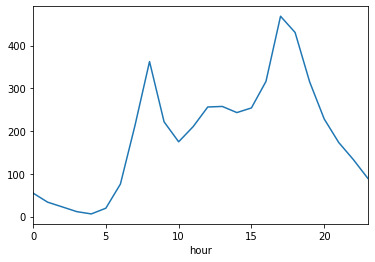

In [11]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean().plot()

Plot for workingday == 0 and workingday == 1

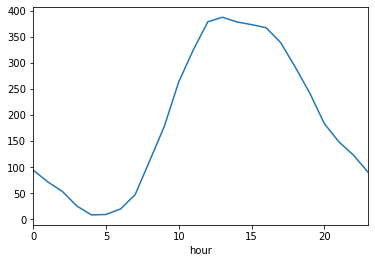

In [12]:
# hourly rental trend for "workingday=0"
bikes[bikes.workingday==0].groupby('hour').total.mean().plot()

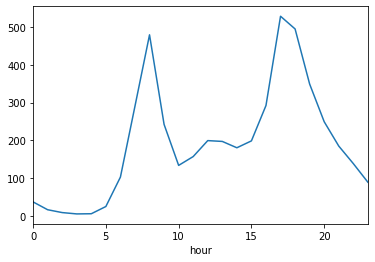

In [13]:
# hourly rental trend for "workingday=1"
bikes[bikes.workingday==1].groupby('hour').total.mean().plot()

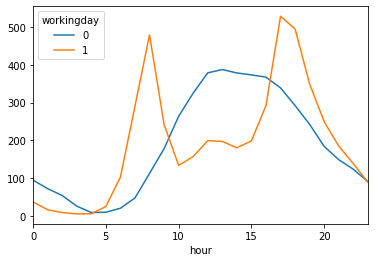

In [14]:
# combine the two plots
bikes.groupby(['hour', 'workingday']).total.mean().unstack().plot()

Write about your findings

El comportamiento de las rentas de bicicletas cambia significativamente entre días hábiles y, fines de semana y festivos. Los picos de los días hábiles se dan a las 8:00 y 17:00 pues coincide con los horarios comunes de intgreso y salida de las actividades como: trabajo y estudio. Los fines de semana y festivos, los niveles promedio de renta son menores, y se presentan picos de renta entre 10:00 y 16:00.

# Exercise 7.3

Fit a linear regression model to the entire dataset, using "total" as the response and "hour" and "workingday" as the only features. Then, print the coefficients and interpret them. What are the limitations of linear regression in this instance?

In [18]:
import statsmodels.api as sm # import statsmodels 

# define the data/predictors as the pre-set feature names  
X = pd.DataFrame(bikes, columns=["workingday","hour"])
y = pd.DataFrame(bikes, columns=["total"])
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

C:\Users\Fernando\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [19]:
# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     1041.
Date:                Sat, 27 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:05:13   Log-Likelihood:                -71093.
No. Observations:               10886   AIC:                         1.422e+05
Df Residuals:                   10883   BIC:                         1.422e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.7060      3.866     17.514      0.000      60.128      75.284
workingday     4.0725      3.413      1.193      0.233      -2.617      10.762
hour          10.4921      0.230     45.611      0.000      10.041      10.943
==============================================================================
Omnibus:                     2283.124   Durbin-Watson:                   0.442
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4452.559
Skew:                           1.274   Prob(JB):                         0.00
Kurtosis:                       4.822   Cond. No.                         39.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [395]:
model.mse_total

32813.31315347235

El modelo de regresión lineal es significativo al 5% de nivel de significancia. Sin embargo, su R2 es muy bajo de 16% por lo que no es adecuado para explicar el número de rentas totales. La constante del modelo resulta significativa con un intercepto que inicia en 67.7 rentas. La variable workingday no es significativa (pv = 0.233). La variable hour sí es significativa (pv = 0.00) y su coeficiente indica que, dejando lo demás constante, por cada hora aumenta 10.49 el número de rentas.

De acuerdo con el comportamiento del número de rentas por hora en el ejercicio 7.3, se observa que la relación entre la variable total y hour no es lineal. Sería una especie de silla de montar que se debería abordar con un modelo de jerárquico del orden correspondiente. Además se esperaria que fuera un modelo con interacción significativa entre las variables working day y hour pues las formas del comportamiento de los datos de total por hora tiene comportamientos muy diferentes.

# Exercice 7.4

Create a Decision Tree to forecast "total" by manually iterating over the features "hour" and "workingday". The algorithm must at least have 6 end nodes.

In [302]:
bikes2 = bikes.copy()
bikes2["prediccion"] = bikes2.total.mean()

In [303]:
def error_hour(bikes, hour):
    bikes['pred'] = bikes.loc[bikes.hour<hour, 'total'].mean()
    bikes.loc[bikes.hour>=hour, 'pred'] = bikes.loc[bikes.hour>=hour, 'total'].mean()
    print ((((bikes['total'] - bikes['pred'])**2).mean()) ** 0.5)
    
def error_workingday(bikes, workingday):
    bikes['pred'] = bikes.loc[bikes.workingday<workingday, 'total'].mean()
    bikes.loc[bikes.workingday>=workingday, 'pred'] = bikes.loc[bikes.workingday>=workingday, 'total'].mean()
    print ((((bikes['total'] - bikes['pred'])**2).mean()) ** 0.5)

In [304]:
for hour in bikes2.hour.unique():
    print('Hour ',hour)
    error_hour(bikes2, hour)
print('----------------------------------')
for workingday in bikes2.workingday.unique():
    print('Hour ',workingday)
    error_workingday(bikes2, workingday)

Hour  0
181.13613357426559
Hour  1
178.88076030483188
Hour  2
175.61266024769844
Hour  3
171.5350162975495
Hour  4
166.57596568309665
Hour  5
160.50832916137819
Hour  6
154.10979930228774
Hour  7
150.22560060405686
Hour  8
153.86972728404965
Hour  9
163.39221989024873
Hour  10
165.25615391972227
Hour  11
165.00286510437286
Hour  12
165.84659205524616
Hour  13
168.04756019190663
Hour  14
169.94604099621912
Hour  15
171.14521362143498
Hour  16
172.47403631919644
Hour  17
175.2235068708682
Hour  18
179.8668827954335
Hour  19
181.12705316323988
Hour  20
180.44126246625746
Hour  21
179.7297936918192
Hour  22
179.51222338944388
Hour  23
179.87454650980683
----------------------------------
Hour  0
181.13613357426559
Hour  1
181.12395921110544


#### Análisis:

Al realizar la primera iteración tenemos el menor valor de RMSE cuanto la hora es igual a 7 (150.2256006040568), por lo cual hacemos el primer spliting a partir de este punto.

In [305]:
bikes_izq = bikes2.loc[bikes2.hour < 7].copy() 
bikes_der = bikes2.loc[bikes2.hour >= 7].copy() 

In [306]:
for hour in bikes_izq.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_izq, hour)
print('----------------------------------')
for workingday in bikes_izq.workingday.unique():
    print('Hour ',workingday)
    error_workingday(bikes_izq, workingday)

Hour  0
39.56714516247788
Hour  1
38.46175887834954
Hour  2
38.827302356307555
Hour  3
39.34538405588436
Hour  4
39.534113157382144
Hour  5
38.30948200125475
Hour  6
35.24426946227024
----------------------------------
Hour  0
39.56714516247788
Hour  1
39.18093811435608


#### Análisis

Para este nivel, encontramos que para la rama izquierda de nuestro árbol el menor RMSE lo encontramos cuando hour es igual a 6 (35.244269462270296), por lo cual realizamos el splitting teniendo en cuenta este punto de corte.

In [307]:
bikes_izq_izq = bikes_izq.loc[bikes2.hour < 6].copy() 
bikes_izq_der = bikes_izq.loc[bikes2.hour >= 6].copy() 

In [308]:
for hour in bikes_der.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_der, hour)
print('----------------------------------')
for workingday in bikes_der.workingday.unique():
    print('Hour ',workingday)
    error_workingday(bikes_der, workingday)

Hour  7
176.28835016242152
Hour  8
175.9626543129351
Hour  9
175.9026463917815
Hour  10
176.22897287604295
Hour  11
176.1454556323947
Hour  12
175.84813796801208
Hour  13
175.89260116453647
Hour  14
175.92916682007098
Hour  15
175.83965773793437
Hour  16
175.82530141788737
Hour  17
176.19523832330185
Hour  18
175.115249088561
Hour  19
170.74027110094912
Hour  20
167.37168785994314
Hour  21
166.69864069956597
Hour  22
168.20616961120874
Hour  23
171.30096203191567
----------------------------------
Hour  0
176.28835016242152
Hour  1
176.2245057824691


#### Análisis

Para este nivel, encontramos que para la rama derecha de nuestro árbol el menor RMSE lo encontramos cuando hour es igual a 21 (166.69864069956617), por lo cual realizamos el splitting teniendo en cuenta este punto de corte.

In [309]:
bikes_der_izq = bikes_der.loc[bikes2.hour < 21].copy() 
bikes_der_der = bikes_der.loc[bikes2.hour >= 21].copy() 

In [310]:
for hour in bikes_izq_izq.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_izq_izq, hour)
print('----------------------------------')
for workingday in bikes_izq_izq.workingday.unique():
    print('Hour ',workingday)
    error_workingday(bikes_izq_izq, workingday)

Hour  0
30.753540668567577
Hour  1
27.614237275202125
Hour  2
27.46590337533093
Hour  3
28.171307299972213
Hour  4
29.557984864071205
Hour  5
30.657024737799514
----------------------------------
Hour  0
30.753540668567577
Hour  1
27.86868086542797


#### Análisis

Para esta rama, vemos que el menor valor de RMSE es cuando la hora es igual a 2 (27.46590337533088), por lo cual hacemos el splitting por ese valor.

In [311]:
for hour in bikes_izq_der.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_izq_der, hour)
print('----------------------------------')
for workingday in bikes_izq_der.workingday.unique():
    print('Hour ',workingday)
    error_workingday(bikes_izq_der, workingday)

Hour  6
54.68514067417475
----------------------------------
Hour  0
54.68514067417475
Hour  1
38.85415488379482


#### Análisis

Para esta rama, vemos que el menor valor de RMSE es cuando workingday es igual a 1, osea día laboral (38.85415488379482), por lo cual hacemos el splitting por ese valor.

In [312]:
for hour in bikes_der_izq.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_der_izq, hour)
print('----------------------------------')
for workingday in bikes_der_izq.workingday.unique():
    print('Hour ',workingday)
    error_workingday(bikes_der_izq, workingday)

Hour  7
180.02864972098826
Hour  8
178.99715046718114
Hour  9
180.0152330686221
Hour  10
179.8185136914361
Hour  11
178.3022430628963
Hour  12
176.75986364527014
Hour  13
176.22253234052977
Hour  14
175.53287560508187
Hour  15
174.04175510396522
Hour  16
172.4267605458089
Hour  17
173.07581303410245
Hour  18
178.6648712641945
Hour  19
179.97602519154125
Hour  20
179.4031992036802
----------------------------------
Hour  0
180.02864972098826
Hour  1
179.9813181571363


#### Análisis

Para esta rama, vemos que el menor valor de RMSE es cuando la hora es igual a 16 (172.42676054580915), por lo cual hacemos el splitting por ese valor.

In [313]:
for hour in bikes_der_der.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_der_der, hour)
print('----------------------------------')
for workingday in bikes_der_der.workingday.unique():
    print('Hour ',workingday)
    error_workingday(bikes_der_der, workingday)

Hour  21
78.9719321218757
Hour  22
73.39673643923476
Hour  23
72.98864033487493
----------------------------------
Hour  0
78.9719321218757
Hour  1
78.59722825511945


#### Análisis

Para esta rama, vemos que el menor valor de RMSE es cuando la hora es igual a 23 (72.98864033487487), por lo cual hacemos el splitting por ese valor.


# Exercise 7.5

Train a Decision Tree using scikit-learn. Comment about the performance of the models.

#### Primero: se desarrolla un árbol con profundidad de 3 para comparar con lo desarrollado manualmente:

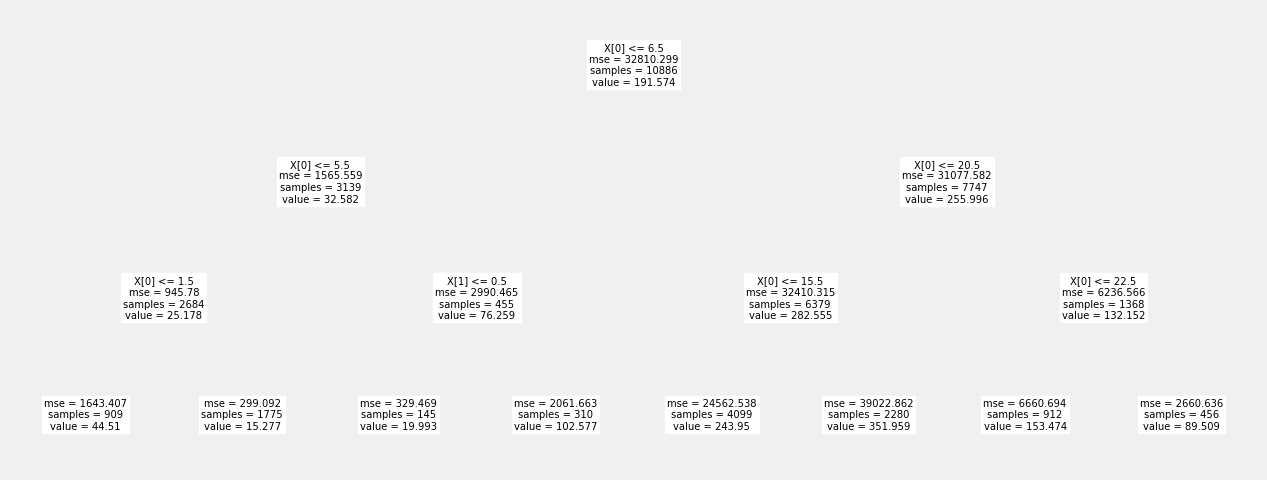

In [396]:
X = bikes[["hour","workingday"]]
Y = bikes[["total"]]
tree_sklearn = DecisionTreeRegressor(max_depth = 3, random_state=0)
# Cross Validation
scores = cross_val_score(tree_sklearn, X, Y, cv=10, scoring='neg_mean_squared_error')
# Graficar el árbol
from sklearn import tree
import matplotlib.pyplot as plt
tree_sklearn.fit(X, Y)
fig, ax = plt.subplots(figsize=(20, 8))
tree.plot_tree(tree_sklearn, fontsize = 10);
plt.show()

In [397]:
print("MSE: " + str(np.mean(-scores)))
print("RMSE: " + str(np.mean(np.sqrt(-scores))))

MSE: 19933.014372022844
RMSE: 136.77375465075121


#### Análisis:

Primero podemos observar que para este ejercicio en particular tenemos mejores resultados con la regresión lineal. Con el arbol de regresión tenemos un MSE de 19933.014 versus un MSE de 32813.31 de la regresión. Por otro lado, pordemos observar que al realizar los árboles de decisión con profundidad 3 tanto por Scikit Learn como manualmente obtenemos los mismos splitting.

Para revisar donde se minimnizan los errores según la profundidad, se desarrolla el seguiente ejercicio:

In [398]:
# Definir el dataframe de variables independientes
X = pd.DataFrame(bikes, columns=["workingday","hour"])
# Definir el dataframe de la variable dependiente
y = pd.DataFrame(bikes, columns=["total"])
# Revisar las caracteristicas de la variable total
y.describe()

,total
count,10886.000000
mean,191.574132
std,181.144454
min,1.000000
25%,42.000000
50%,145.000000
75%,284.000000
max,977.000000


In [315]:
# list of values to try for max_depth
max_depth_range = range(1, 21)

# list to store the average RMSE for each value of max_depth
neg_mean_squared_error = []

for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    neg_mean_squared_error.append(cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error').mean())

In [317]:
neg_mean_squared_error

[-23999.045644590173,
 -21638.47027467516,
 -19933.014372022844,
 -18769.533795568655,
 -15270.381581865198,
 -13351.093232703002,
 -13156.78342111136,
 -13148.496357550277,
 -13143.878482047303,
 -13143.121883295113,
 -13143.121883295113,
 -13143.121883295113,
 -13143.121883295113,
 -13143.121883295113,
 -13143.121883295113,
 -13143.121883295113,
 -13143.121883295113,
 -13143.121883295113,
 -13143.121883295113,
 -13143.121883295113]

#### Análisis:

Se puede observar que a partir de la profundidad de 10 se llega la mínimo error cuadrático medio. Sin embargo, es desde el valor 6 de profundidad que se logra un cambio en la tendencia del decrecimiento de dicho error.

Text(0, 0.5, 'neg_mean_squared_error')

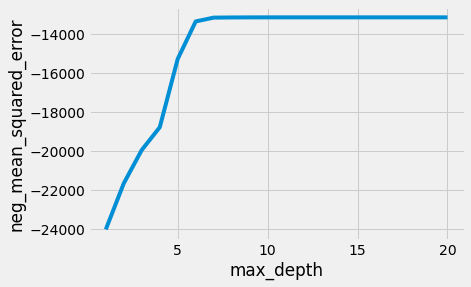

In [316]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, neg_mean_squared_error)
plt.xlabel('max_depth')
plt.ylabel('neg_mean_squared_error')

#### Análisis:

Se desarrollaron diferentes árboles de regresión aplicando diferentes profundidades. En la gráfica se puede observar como va cambiando el valor del error cuádratico en la medida que aumenta la profundidad. Se puede ver que el punto de inflexión de la curva es a partir de la profundidad 6. Llega al máximo en la profundidad 10. Sin embargo, no son relevantes los cambios entre la profundidad 7 y la profundidad 10. Por lo tanto, para evitar el riesgo de overfittig se puede hacer el corte en 6 niveles.


# Part 2 - Bagging

## Mashable news stories analysis

Predicting if a news story is going to be popular

In [540]:
df = pd.read_csv('C:\\Users\\Fernando\\Documents\\AdvancedMethodsDataAnalysisClass\\datasets\\mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [541]:
df.shape

(6000, 61)

In [542]:
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']

In [543]:
y.mean()

0.5

In [544]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [545]:
X_train.shape

(4500, 59)

# Exercise 7.6

Estimate a Decision Tree Classifier and a Logistic Regression

Evaluate using the following metrics:
* Accuracy
* F1-Score

### Decision Tree Classifier

In [546]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini',splitter='best', max_depth=None,)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [547]:
# Predict 
y_pred_df = pd.DataFrame(index=X_test.index)
y_pred_df = tree.predict(X_test)

In [548]:
from sklearn import metrics
#Accuracy ()
print("Accuracy",tree.score(X_test, y_test))
print("F1-Score",metrics.f1_score(y_pred_df, y_test))

Accuracy 0.544
F1-Score 0.544


### Logistic Regression

In [549]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [550]:
# Predict 
y_pred_lg = pd.DataFrame(index=X_test.index)
y_pred_lg = logreg.predict(X_test)
y_pred_lg

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [551]:
# Accuracy
print("Accuracy",logreg.score(X_test, y_test))
print("F1 Score",metrics.f1_score(y_pred_lg, y_test))

Accuracy 0.6273333333333333
F1 Score 0.6104529616724739


## Conclusión
Al ver los medidas de accuracy y F1-score se puede concluir que la regresión logística presenta un mejor desempeño para predecir si la historia es o no popular

# Exercise 7.7

Estimate 300 bagged samples

Estimate the following set of classifiers:

* 100 Decision Trees where max_depth=None
* 100 Decision Trees where max_depth=2
* 100 Logistic Regressions

In [552]:
#Armar las muestras para los 300 árboles

# set a seed for reproducibility
np.random.seed(123)

# Defidiendo el tamaño de los sampple (n_B)
n_samples = X_train.shape[0]
n_B = 300
# create ten bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]

In [553]:
X_train.shape[0]


4500

In [554]:
# show the rows for the first decision tree
X_train.iloc[samples[0], :]


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
2239,142.0,11.0,135.0,0.631579,1.0,0.690000,11.0,4.0,8.0,0.0,...,0.354762,0.285714,0.50,-0.308333,-0.625,-0.100000,0.333333,0.250000,0.166667,0.250000
4838,349.0,10.0,1411.0,0.431259,1.0,0.630996,7.0,6.0,4.0,1.0,...,0.438312,0.050000,1.00,-0.322500,-0.800,-0.100000,1.000000,0.100000,0.500000,0.100000
1047,731.0,12.0,238.0,0.621277,1.0,0.823077,3.0,1.0,1.0,0.0,...,0.291259,0.100000,0.60,0.000000,0.000,0.000000,0.000000,0.000000,0.500000,0.000000
373,583.0,8.0,253.0,0.661355,1.0,0.846667,7.0,0.0,0.0,1.0,...,0.432149,0.050000,1.00,-0.247194,-0.500,-0.071429,0.400000,-0.400000,0.100000,0.400000
2595,659.0,15.0,458.0,0.512088,1.0,0.662879,5.0,3.0,1.0,0.0,...,0.368586,0.136364,0.80,-0.219167,-0.500,-0.125000,0.454545,0.136364,0.045455,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3212,37.0,9.0,1215.0,0.475129,1.0,0.680000,7.0,5.0,6.0,25.0,...,0.432542,0.050000,1.00,-0.389109,-1.000,-0.050000,0.000000,0.000000,0.500000,0.000000
5303,555.0,11.0,147.0,0.751724,1.0,0.860215,4.0,4.0,0.0,2.0,...,0.520000,0.200000,0.85,-0.333333,-0.500,-0.166667,0.700000,0.000000,0.200000,0.000000
4232,69.0,10.0,102.0,0.772277,1.0,0.909091,4.0,4.0,1.0,1.0,...,0.166667,0.100000,0.20,0.000000,0.000,0.000000,0.000000,0.000000,0.500000,0.000000
4153,122.0,14.0,687.0,0.481426,1.0,0.620525,6.0,3.0,1.0,0.0,...,0.330567,0.050000,0.80,-0.470238,-1.000,-0.125000,0.800000,0.400000,0.300000,0.400000


In [555]:
# grow each tree
treereg = DecisionTreeClassifier(max_features=None,max_depth=3, random_state=123) # ramdom state es la semilla
treereg_md2 = DecisionTreeClassifier(max_features=None,max_depth=2, random_state=123) # ramdom state es la semilla
loggregg = LogisticRegression(random_state=123) # ramdom state es la semilla #random_state=123

# DataFrame for storing predicted price from each tree
y_pred = pd.DataFrame(index=X_test.index, columns=[list(range(n_B))])

# grow one tree for each bootstrap sample and make predictions on testing data
for i, sample in enumerate(samples[0:100]):
    X_train = X_train.iloc[sample, 0:]
    y_train = y_train.iloc[sample, ]
    loggregg.fit(X_train, y_train)
    y_pred[[i]] = loggregg.predict(X_test)
for i, sample in enumerate(samples[100:200]):
    X_train = X_train.iloc[sample, 0:]
    y_train = y_train.iloc[sample, ]
    treereg.fit(X_train, y_train)
    y_pred[[i+99]] = treereg.predict(X_test)
for i, sample in enumerate(samples[199:300]):
    X_train = X_train.iloc[sample, 0:]
    y_train = y_train.iloc[sample, ]
    treereg_md2.fit(X_train, y_train)
    y_pred[[i+199]] = treereg_md2.predict(X_test)

C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

In [556]:
y_pred

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
1483,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,1
2185,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2520,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
3721,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3077,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
5166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2227,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5684,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


#### Análisis:

Las estimaciones de los árboles quedan en una matriz de 300 columnas donde cada 100 es un modelo con caracteristicas diferentes.


# Exercise 7.8

Ensemble using majority voting

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [557]:
y_pred.sum(axis=1)

1483    237
2185    276
2520    229
3721    128
3727     37
       ... 
3077    137
5166    120
2227    192
5684     32
1937     73
Length: 1500, dtype: int64

In [558]:
n_estimators = n_B
y_pred_majority = (y_pred.sum(axis=1)>=(n_estimators/2)).astype(np.int)
print('F1_score=%f, Accuracy = %f'%(metrics.f1_score(y_test,y_pred_majority), metrics.accuracy_score(y_test,y_pred_majority)))
#metrics.f1_score(y_test,y_pred_majority)

F1_score=0.584285, Accuracy = 0.587333


#### Análisis:

Al juntar los árboles por mayor votación vemos que se equilibran los resultados de Accuracy y del F1 Score siendo mejores que los anteriormente construidos.

# Exercise 7.9

Estimate te probability as %models that predict positive

Modify the probability threshold and select the one that maximizes the F1-Score

In [559]:
from sklearn.metrics import precision_recall_curve
y_pred_th = (y_pred.sum(axis=1) / n_estimators)

In [560]:
precision, recall, threshold = precision_recall_curve(y_test, y_pred_th)

f1 = 2 * recall * precision /(recall+precision)

print("Threshold: ", threshold[np.argmax(f1)])
print("f1 score: ", np.max(f1))

Threshold:  0.15333333333333332
f1 score:  0.6792088760250844


##### Análisis

Cambiar el treshold se mejora bastante el resultado de precisión calculado por el F1 score.

# Exercise 7.10

Ensemble using weighted voting using the oob_error

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [561]:
samples_oob = []
# show the "out-of-bag" observations for each sample
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))


In [562]:
range(n_estimators)

range(0, 300)

In [563]:
errors = np.zeros(n_estimators)

for i in range(0,100):
    y_pred_ = treereg.predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)
for i in range(100,200):
    y_pred_ = loggregg.predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)
for i in range(200,300):
    y_pred_ = treereg_md2.predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

In [564]:
y_pred_

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [565]:
errors

array([0.04131227, 0.05046154, 0.04009575, 0.04910988, 0.04540024,
       0.04817073, 0.04761905, 0.04256595, 0.04985163, 0.04945718,
       0.04705882, 0.04710793, 0.04133739, 0.04081633, 0.0508167 ,
       0.05535055, 0.04507711, 0.05078597, 0.04550898, 0.05035971,
       0.04674047, 0.04599761, 0.05512283, 0.03973105, 0.05062537,
       0.04767652, 0.04911243, 0.0495916 , 0.04531722, 0.04260499,
       0.04882459, 0.04759036, 0.04011976, 0.04608854, 0.04837722,
       0.04849601, 0.04670659, 0.04559271, 0.04423192, 0.03985507,
       0.04830918, 0.0421365 , 0.05253623, 0.04756098, 0.04855562,
       0.04640095, 0.04384896, 0.04642639, 0.04410012, 0.04463209,
       0.04617183, 0.04501217, 0.04444444, 0.04649758, 0.05205144,
       0.04904966, 0.04921969, 0.04371585, 0.04528764, 0.04537205,
       0.04292624, 0.04581073, 0.04866469, 0.04727273, 0.04425837,
       0.05447942, 0.05033763, 0.05192425, 0.04782082, 0.04264264,
       0.04662283, 0.03980404, 0.04770531, 0.04954128, 0.05065

Text(0.5, 1.0, 'OOB error of each tree')

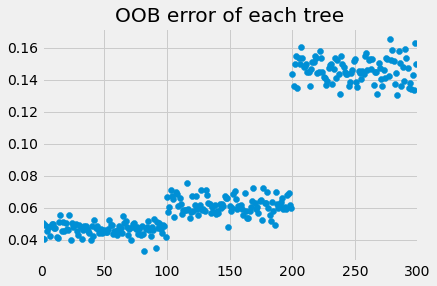

In [566]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(range(n_estimators), errors)
plt.xlim([0, n_estimators])
plt.title('OOB error of each tree')

#### Análisis:

Se presentan diferencia importantes en los errores de los modelos de arbol siendo mucho menores en los del los que no tienen restricción de profundidad. El modelo de regresión logística presenta resultados con menores errores, aunque no tan lejanos del modelo de arbol sin restricción de profundidad.


In [567]:
alpha = (1 - errors) / (1 - errors).sum()
weighted_sum_1 = ((y_pred) * alpha).sum(axis=1)
weighted_sum_1.head(20)

1483    0.788183
2185    0.921547
2520    0.761260
3721    0.418942
3727    0.125134
4524    0.524915
234     0.383011
4735    0.394207
5839    0.381254
2939    0.738702
3053    0.596833
867     0.644919
276     0.776356
5798    0.024892
3512    0.854073
5789    0.116191
3198    0.854641
5908    0.467315
5718    0.496225
2687    0.277174
dtype: float64

In [569]:
y_pred_10 = (weighted_sum_1 >= 0.5).astype(np.int)

print("Accuracy: ", metrics.accuracy_score(y_pred_10, y_test))
print("f1 score: ", metrics.f1_score(y_pred_10, y_test))

Accuracy:  0.588
f1 score:  0.5807327001356852


#### Análisis

El modelo con pesos ponderados presenta resultados similares al que resultó de mayores votaciones. En princio se recomienda no desgastarse con ponderar los pesos y hacer con mayores votaciones.

# Exercise 7.11

Estimate te probability of the weighted voting

Modify the probability threshold and select the one that maximizes the F1-Score

In [570]:
precision, recall, threshold = precision_recall_curve(y_test, weighted_sum_1)

f1_w = 2 * recall * precision /(recall+precision)

print("Threshold: ", threshold[np.argmax(f1_w)])
print("f1 score: ", np.max(f1_w))

Threshold:  0.15605623088271914
f1 score:  0.6795928259815802


#### Análisis

Con el nuevo tresh hold se consiguen los mejores resultados en comparación con los anteriores numerales. La recomendación sería usar este camino para predecir.

# Exercise 7.12

Estimate a logistic regression using as input the estimated classifiers

Modify the probability threshold such that maximizes the F1-Score

In [573]:
X_train_2 = pd.DataFrame(index=X_train.index, columns=list(range(n_estimators)))

for i in range(0,100):
    X_train_2[i] = treereg.predict(X_train)
for i in range(100,200):
    X_train_2[i] = loggregg.predict(X_train)
for i in range(200,300):
    X_train_2[i] = treereg_md2.predict(X_train)
    


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3615,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
546,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
339,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5975,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4775,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1755,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [574]:
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(cv = 5 )
lr.fit(X_train_2, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [576]:
y_pred_lr12 = lr.predict(y_pred)

print("Accuracy: ", metrics.accuracy_score(y_pred_lr12, y_test))
print("f1 score: ", metrics.f1_score(y_pred_lr12, y_test))

Accuracy:  0.59
f1 score:  0.5790554414784395


In [578]:
precision, recall, threshold = precision_recall_curve(y_test, y_pred_lr12)

f1_lr = 2 * recall * precision /(recall+precision)

print("Threshold: ", threshold[np.argmax(f1_lr)])
print("f1 score: ", np.max(f1_lr))

Threshold:  0
f1 score:  0.6702127659574468
